In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wrestler_stats.csv', encoding='unicode_escape')

# Implementing One-Hot Function

In [3]:
def make_one_hot(df: pd.DataFrame, features: list):
    new_data = data.copy(deep=True)
    for i in range(0, len(features)):
        categories = pd.Series(df[features[i]].squeeze().unique())
        
        for j in range(0, categories.size):
            new_column = pd.DataFrame(df[features[i]].copy(deep=True).rename(categories[j]))
            new_column[new_column[categories[j]] != categories[j]] = 0
            new_column[new_column[categories[j]] == categories[j]] = 1

            new_data[str(features[i]) + ':' + str(categories[j])] = new_column
        new_data = new_data.drop(columns=features[i], axis=1)
    return new_data
    print(new_data.head())

# Encoding features as One-Hot

In [4]:
new_data = make_one_hot(data, ['heel/face', 'turn in last 2 months', 'has belt', 'state', 'country'])
saraya = new_data.loc[data['Name'] == 'Saraya']
jun = new_data.loc[data['Name'] == 'Jun Akiyama']
new_data = new_data.loc[data['Name'] != 'Saraya']
new_data = new_data.loc[data['Name'] != 'Jun Akiyama']

# Let's see what columns we have

In [5]:
new_data.columns

Index(['Name', 'belt tenure', 'AEW belts held',
       'belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)',
       'height (in cm)', 'weight (in kg)', 'Overall win percentage',
       'AEW win percentage', '5 star match count', 'latest pwi ranking',
       'social media followers (twitter + instagram)', 'AEW merch item count',
       'hometown', 'tenure', 'wins per tensure', 'elo', 'heel/face:Heel',
       'heel/face:Face', 'turn in last 2 months:No',
       'turn in last 2 months:Yes', 'has belt:No', 'has belt:Yes',
       'state:Florida', 'state:Virginia', 'state:Ontario', 'state:Georgia',
       'state:Texas', 'state:California', 'state:Washington', 'state:New York',
       'state:Lucerne', 'state:Illinois', 'state:Michigan', 'state:Minnesota',
       'state:Pennsylvania', 'state:Chiba', 'state:Kanagawa',
       'state:South East England', 'state:New Jersey', 'state:Ohio',
       'state:Osaka', 'state:Manitoba', 'state:Norfolk', 'state:nan',
       '

# Testing a few categories to see how they show up

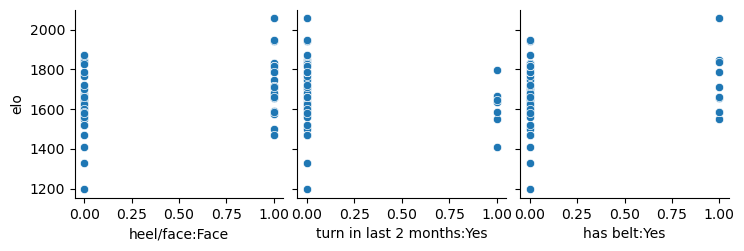

In [6]:
sns.pairplot(new_data, x_vars=['heel/face:Face', 'turn in last 2 months:Yes', 'has belt:Yes'], y_vars=['elo'])

# Does country matter?

By the looks of it, not really (or not enough data for particular countries to say)

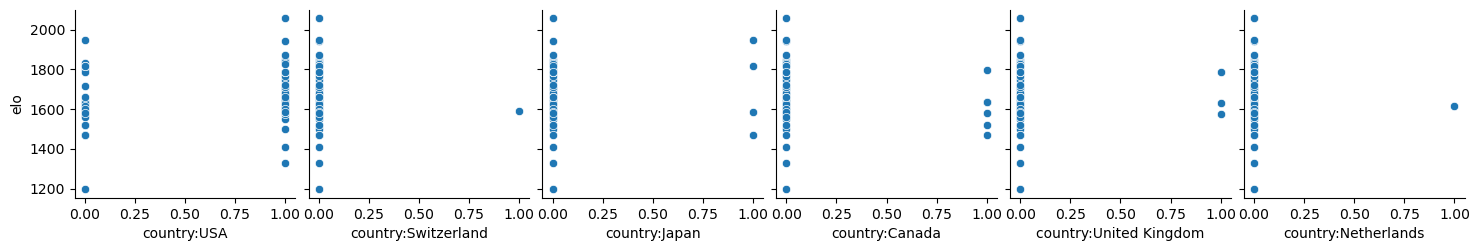

In [7]:
sns.pairplot(new_data, x_vars=['country:USA', 'country:Switzerland', 'country:Japan',
       'country:Canada', 'country:United Kingdom', 'country:Netherlands'], y_vars=['elo'])

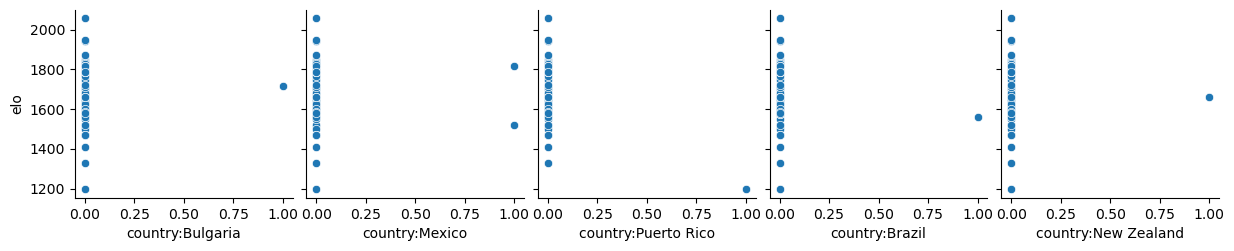

In [8]:
sns.pairplot(new_data, x_vars=['country:Bulgaria', 'country:Mexico', 'country:Puerto Rico',
       'country:Brazil', 'country:New Zealand'], y_vars=['elo'])

# Looking at other stats

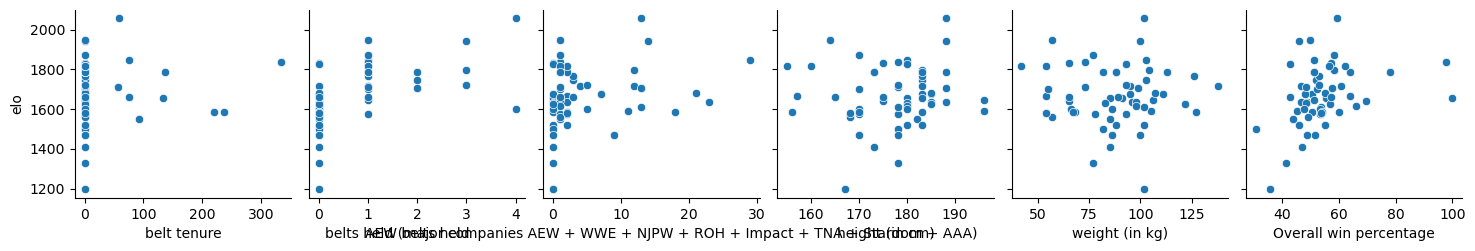

In [9]:
sns.pairplot(new_data, x_vars=['belt tenure', 'AEW belts held',
   'belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)',
   'height (in cm)', 'weight (in kg)', 'Overall win percentage'], y_vars=['elo'])

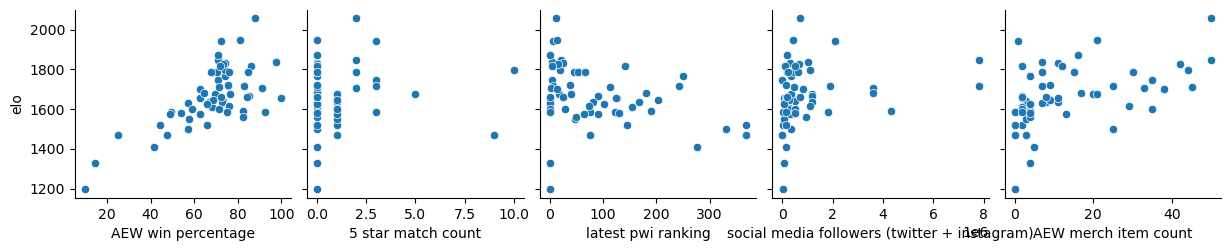

In [10]:
sns.pairplot(new_data, x_vars=['AEW win percentage', '5 star match count', 'latest pwi ranking',
   'social media followers (twitter + instagram)', 'AEW merch item count'], y_vars=['elo'])

# Let's see how the various stats compare

## Heel or Face 

Y-intercept is 1609.7777777777776
Slope is 114.48538011695908
MSE is 146.18959926107223
R squard value is 0.12943974460666596


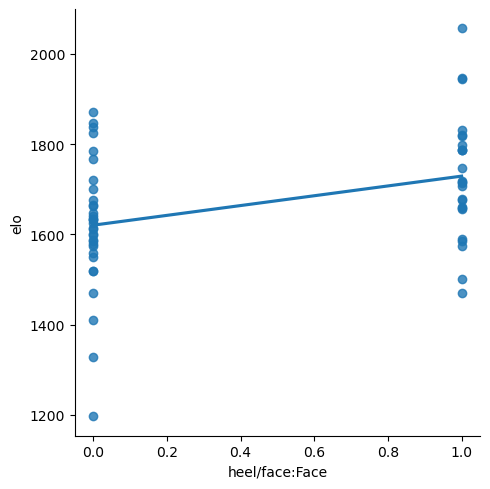

In [11]:
features = ['heel/face:Face']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

linearModel = LinearRegression()
linearModel.fit(XTrain.values, YTrain)

print('Y-intercept is',linearModel.intercept_)
print('Slope is',linearModel.coef_[0])
print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrain.values), YTrain)))
print("R squard value is", linearModel.score(XTrain.values, YTrain))
sns.lmplot(x='heel/face:Face', y=predicted, data=new_data[['heel/face:Face', 'elo']].astype('float64'), ci=0)
plt.show()

## Number of AEW Belts Held

Y-intercept is 1599.184282907662
Slope is 80.68251473477407
MSE is 129.3041860469181
R squard value is 0.31893109209311576


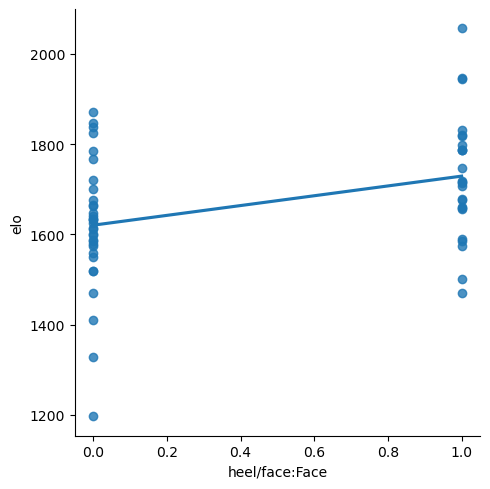

In [12]:
features = ['AEW belts held']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

linearModel = LinearRegression()
linearModel.fit(XTrain.values, YTrain)

print('Y-intercept is',linearModel.intercept_)
print('Slope is',linearModel.coef_[0])
print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrain.values), YTrain)))
print("R squard value is", linearModel.score(XTrain.values, YTrain))
sns.lmplot(x='heel/face:Face', y=predicted, data=new_data[['heel/face:Face', 'elo']].astype('float64'), ci=0)
plt.show()

## Number of social media followers

Y-intercept is 1633.6484515241739
Slope is 2.3116741220892278e-05
MSE is 151.48830665766897
R squard value is 0.06518836987014143


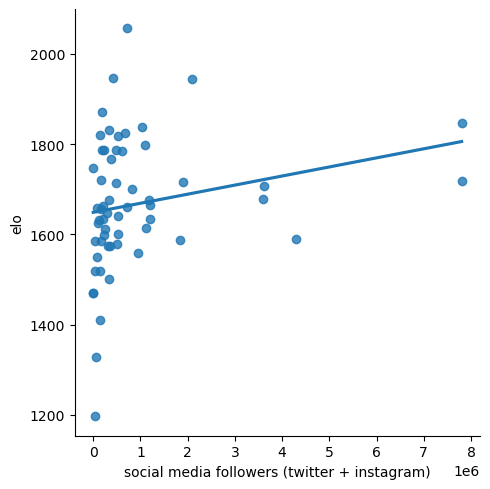

In [13]:
features = ['social media followers (twitter + instagram)']
predicted = 'elo'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)


linearModel = LinearRegression()
linearModel.fit(XTrain.values, YTrain)

print('Y-intercept is',linearModel.intercept_)
print('Slope is',linearModel.coef_[0])
print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrain.values), YTrain)))
print("R squard value is", linearModel.score(XTrain.values, YTrain))
sns.lmplot(x='social media followers (twitter + instagram)', y=predicted, data=new_data[['social media followers (twitter + instagram)', 'elo']].astype('float64'), ci=0)
plt.show()

# Real model and calculations follow:

In [14]:
features = ['AEW belts held', 'social media followers (twitter + instagram)',
            'has belt:Yes', 'AEW merch item count', 'belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)']
predicted = 'AEW win percentage'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

deg = 1
poly = PolynomialFeatures(degree=deg)
XTrans = poly.fit_transform(XTrain)
linearModel = LinearRegression()
linearModel.fit(XTrans, YTrain)

print('Y-intercept is',linearModel.intercept_)
print('Slope is',linearModel.coef_[0])
print("MSE is", np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain)))
print("R squard value is", linearModel.score(XTrans, YTrain))
# sns.lmplot(x='social media followers (twitter + instagram)', y=predicted, data=new_data[['social media followers (twitter + instagram)', 'elo']].astype('float64'), ci=0)
# plt.show()

Y-intercept is 59.21970377668932
Slope is 0.0
MSE is 15.831173806255492
R squard value is 0.2215607543526138


# Doing our predictions with the Full Gear and All Out Pay-Per-View Event wrestlers

In [15]:
fg_matchups = pd.read_csv('show_results.csv')

fg_wrestlers = set()
fg_wrestlers.update(fg_matchups['w1'].values)
fg_wrestlers.update(fg_matchups['w2'].values)

In [16]:
fg_wrestlers

{'Adam Page',
 'Angelo Parker',
 'Anna Jay',
 'Athena',
 'Brian Cage',
 'Bryan Danielson',
 'CM Punk',
 'Chris Jericho',
 'Christian Cage',
 'Dr. Britt Baker DMD',
 'Eddie Kingston',
 'Hook',
 'Jack Perry',
 'Jade Cargill',
 'Jamie Hayter',
 'Jon Moxley',
 'Jun Akiyama',
 'Kip Sabian',
 'Luchasaurus',
 'MJF',
 'Nyla Rose',
 'PAC',
 'Powerhouse Hobbs',
 'Ricky Starks',
 'Saraya',
 'Tomohiro Ishii',
 'Toni Storm',
 'Wardlow'}

# Re-adding Jun and Saraya

Because Saraya and Jun were new to AEW during the Full Gear event, we didn't want to skew the results by adding them. However, for the prediction we do want to ensure they are included.

In [17]:
new_data = pd.concat([new_data, saraya])
new_data = pd.concat([new_data, jun])

In [18]:
fg_names = new_data.loc[data['Name'].isin(fg_wrestlers)]['Name']
fg_predict = new_data.loc[data['Name'].isin(fg_wrestlers)][features]

In [19]:
fg_predicted = linearModel.predict(poly.fit_transform(fg_predict.values))

In [20]:
fg_predict['predicted'] = fg_predicted
fg_predict['name'] = fg_names

In [21]:
fg_predict.sort_values('predicted')
fg_matchup_df = pd.DataFrame(fg_matchups, columns=['w1', 'w2', 'winner', 'show'])

In [22]:
fg_matchup_df = fg_matchup_df \
    .merge(fg_predict, left_on=['w1'], right_on=['name']) \
    .rename(columns={'predicted': 'predicted_1'})
fg_matchup_df = fg_matchup_df.drop(labels=features + ['name'], axis=1)
fg_matchup_df = fg_matchup_df \
    .merge(fg_predict, left_on=['w2'], right_on=['name']) \
    .rename(columns={'predicted': 'predicted_2'})
fg_matchup_df = fg_matchup_df.drop(labels=features + ['name'], axis=1)

In [23]:
fg_matchup_df.loc[fg_matchup_df['predicted_1'] > fg_matchup_df['predicted_2'], 'predicted_winner'] = fg_matchup_df.loc[fg_matchup_df['predicted_1'] > fg_matchup_df['predicted_2'], 'w1']
fg_matchup_df.loc[fg_matchup_df['predicted_1'] < fg_matchup_df['predicted_2'], 'predicted_winner'] = fg_matchup_df.loc[fg_matchup_df['predicted_1'] < fg_matchup_df['predicted_2'], 'w2']
fg_matchup_df['correct'] = fg_matchup_df['winner'] == fg_matchup_df['predicted_winner']

In [24]:
fg_matchup_df

,w1,w2,winner,show,predicted_1,predicted_2,predicted_winner,correct
0,Eddie Kingston,Jun Akiyama,Eddie Kingston,Full Gear,61.935126,59.331795,Eddie Kingston,True
1,Eddie Kingston,Tomohiro Ishii,Eddie Kingston,All Out,61.935126,54.648857,Eddie Kingston,True
2,Jon Moxley,MJF,MJF,Full Gear,87.085231,64.592319,Jon Moxley,False
3,Wardlow,MJF,Wardlow,Double or Nothing,74.698086,64.592319,Wardlow,True
4,Dr. Britt Baker DMD,Saraya,Saraya,Full Gear,69.116150,89.777214,Saraya,True
5,Brian Cage,Ricky Starks,Ricky Starks,Full Gear,64.082844,64.662876,Ricky Starks,True
6,Powerhouse Hobbs,Ricky Starks,Powerhouse Hobbs,All Out,59.832814,64.662876,Ricky Starks,False
7,Jack Perry,Luchasaurus,Jack Perry,Full Gear,65.697726,65.166864,Jack Perry,True
8,Jade Cargill,Nyla Rose,Jade Cargill,Full Gear,77.063506,65.269293,Jade Cargill,True
9,Jade Cargill,Anna Jay,Jade Cargill,Double or Nothing,77.063506,61.322051,Jade Cargill,True


In [25]:
fg_matchup_df['correct'].value_counts()

True     13
False     5
Name: correct, dtype: int64

In [26]:
features = ['AEW belts held', 'social media followers (twitter + instagram)',
            'has belt:Yes', 'AEW merch item count', 'belts held (major companies AEW + WWE + NJPW + ROH + Impact + TNA + Stardom + AAA)']
predicted = 'AEW win percentage'
XTrain = new_data[features]
YTrain = new_data[predicted]

XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.2, random_state=2)

max_deg = 10
RMSE = np.zeros(max_deg + 1)
for deg in range(1, max_deg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    linearModel = LinearRegression()
    linearModel.fit(XTrans, YTrain)

    print('Y-intercept is',linearModel.intercept_)
    print('Slope is',linearModel.coef_[0])
    RMSE[deg] = np.sqrt(mean_squared_error(linearModel.predict(XTrans), YTrain))
    print("RMSE is", RMSE[deg])
    print("R squard value is", linearModel.score(XTrans, YTrain))
    print()
    # sns.lmplot(x='social media followers (twitter + instagram)', y=predicted, data=new_data[['social media followers (twitter + instagram)', 'elo']].astype('float64'), ci=0)
    # plt.show()

Y-intercept is 59.935076762144476
Slope is 0.0
RMSE is 16.1901436728051
R squard value is 0.2328862945054173

Y-intercept is 49.155961860549326
Slope is 0.0
RMSE is 10.372447570756147
R squard value is 0.6851375770298449

Y-intercept is 49.67711793387179
Slope is 1.7625478894686993e-05
RMSE is 10.887107993718342
R squard value is 0.6531166950120112

Y-intercept is 62.49775157465358
Slope is -7.145718514919692e-14
RMSE is 13.874129332955588
R squard value is 0.4366610060835342

Y-intercept is 64.19903192973554
Slope is -1.095157077178928e-19
RMSE is 14.197592472701448
R squard value is 0.410087296422907

Y-intercept is 65.25915414240687
Slope is 1.0370332128618775e-29
RMSE is 14.949636540167425
R squard value is 0.3459369657270235

Y-intercept is 66.15672547209094
Slope is 1.3325077658665027e-34
RMSE is 15.11233150646098
R squard value is 0.3316233332562193

Y-intercept is 66.23905996414753
Slope is -2.778931874787986e-44
RMSE is 15.128459172455292
R squard value is 0.3301960078401768



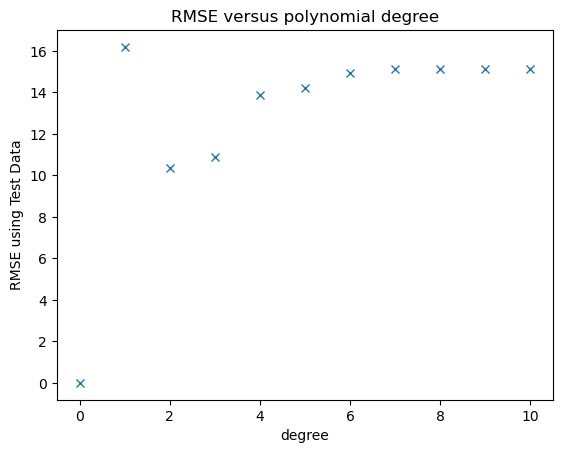

In [27]:
plt.plot(range(0, max_deg+1), RMSE, 'x')
plt.title('RMSE versus polynomial degree')
plt.xlabel('degree')
plt.ylabel('RMSE using Test Data')
plt.show()

We can see in the graph above that our best RMSE comes from a degree of two